# <center>CHOOSING PRIOR</center>
- Việc chọn prior không nên chọn 1 giá trị, mà chọn 1 phân phối.  
~Bạn không cần thu thập data nếu bạn tin chắc điều đó sẽ xảy ra hoặc không xảy ra.
- Trong bài trước có nói chọn prior bằng 2 cách:
    - Chọn 1 prior nào đó có prior predictive distribution chứa 95% mẫu mình sẽ thu thập.
    - Chọn [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) . **Cách này dùng nhiều hơn**

Conjugate prior là prior cho likelihood để ra posterior giống prior  
Ví dụ:  
    - beta posterior $\propto$ bernoulli/binomial likelihood $\times$ beta prior  
    - norm $\propto$ norm $\times$ norm  
    - gamma $\propto$ exponential $\times$ gamma


---
# Prior predictive distribution
$ \text{Prior} = f(\theta) $  
$ f(x) = \int f(x|\theta)f(\theta)d\theta$  
Giả sử đồng xu chưa biết p(head) thế nào, tao tung đồng xu 10 lần.  
=> prior là uniform, PDF là binom(n=10, p=$\theta$)  
prior predictive distribution là function xem x là biến, ngược với likelihood xem theta là biến.  
$ f(x) = \int_0^1 C^{10}_x \theta^x (1-\theta)^{10-x} dx$  
$ = \int_0^1 \frac{10!}{x!(10-x)!}\theta^{x}(1-\theta)^{10-x}d\theta $  

Nhắc lại:
- $\Gamma(x) = (x-1)!$
- f(x) khá giống với pdf của beta distribution $\text{PDF} = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}I_{\{0< x< 1\}}$
- Ta sẽ chuyển f(x) thành beta

$ f(x)= \int_0^1 \frac{\Gamma(11)}{\Gamma(x+1)\Gamma(11-x)}\theta^{(x+1)-1}(1-\theta)^{(11-x)-1}d\theta $  
$ = \frac{\Gamma(11)}{\Gamma(12)} \int_0^1 \frac{\Gamma(12)}{\Gamma(x+1)\Gamma(11-x)}\theta^{(x+1)-1}(1-\theta)^{(11-x)-1}d\theta $  
$ = \frac{\Gamma(11)}{\Gamma(12)} \int_0^1(\text{PDF Beta}(\alpha=x+1; \beta=11-x)) $  
$ = \frac{\Gamma(11)}{\Gamma(12)} \times 1 = \frac{1}{11}$  

Nghĩa là với một đồng xu có xác suất p(head) đều nhau (uniform),  
thì xác suất ra 0,1,.. hoặc 10 heads (11 con số) là bằng nhau

# Posterior predictive distribution
Tương tự như prior predictive  
= PDF x posterior  
$ f(x|y) = \int f(x|p) f(p|y) dp $  
Ví dụ:  
Với đồng xu như ví dụ ở trên, ta có data y=1  
Ta tìm posterior tương tự như bài Bayesian inference  
=>$f(p|y=1) = 2p I_{\{0 \leq x \leq 1 \}} $    

Ta tính posterior predictive distribution cho lần tung tiếp theo  
$ f(x) =\int_{-\infty}^{\infty} p^x (1-p)^{1-x} 2p I_{\{0 \leq x \leq 1 \}} dp$  
$= \int_0^1 p^x (1-p)^{1-x} 2p dp $  

Để ra head next: $ f(x=1) = \int_0^1 2p^2dp = \frac{2}{3} $  
Để ra tail next: $ f(x=0) = \int_0^1 2p(1-p) d\theta = \frac{1}{3} $

---
# Beta $\propto$ Bernoulli/binomial $\times$ beta
**Công thức:**  
Beta($\alpha$+k, $\beta$+n-k) $\propto$ Bernoulli/binomial(n, k) $\times$ beta($\alpha$, $\beta$)

Prior Beta($\alpha$, $\beta$)
- Trong ví dụ đồng xu thì $\alpha$ là số lần ra head, $\beta$ là số lần ra tail.
- Uniform là beta(1,1), tức là 0 head, 0 tail.

Likelihood Bernoulli/Binomial
- binom khác bernoulli ở chỗ $C^n_k$, đây chỉ là 1 constant, sẽ được nằm trong constant của posterior beta

Posterior Beta($\alpha$, $\beta$)
- $\alpha$ thêm số lần ra head, $\beta$ thêm số lần ra tail của data

Hyperparameters
- $\alpha$, $\beta$ được gọi là hyperparameters ( ví dụ là p(head) của đồng xu)

Effective sample size
- Mean của beta prior là $\frac{\alpha}{\alpha + \beta} $
- Effective sample size của beta prior là $\alpha + \beta $
- Mean của beta posterior là $\frac{\alpha + k }{\alpha + \beta + n}  = \frac{\alpha + \beta}{\alpha + \beta + n}\frac{\alpha}{\alpha + \beta}+\frac{n}{\alpha + \beta + n}\frac{k}{n} $  = prior *weight* x prior *mean* + sample *weight* x sample *mean*  
Nhìn vào weight của prior và sample, ta thấy:
    - $\alpha + \beta$ là effective sample size
    - n là data sample size.  
Khi n >> $\alpha + \beta$ thì posterior ít bị ảnh hưởng bởi prior.

In [1]:
# Một xét nghiệm chẩn đoán mới đang nghiên cứu dùng theta là tỉ lệ thất bại trong việc chẩn đoán xác định.
# Xét nghiệm này khá đắt, và số tiền được hỗ trợ nghiên cứu chỉ được thử nghiệm trong 20 ca đã có cđxđ.
# Gọi X là số ca xét nghiệm thất bại
# Prior là beta(2,2)
# Mean = a/(a+b) = 0.5
# Effective sample size = a+b = 4
# Data là 6 ca thất bại, 14 ca chẩn đoán đúng.

import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

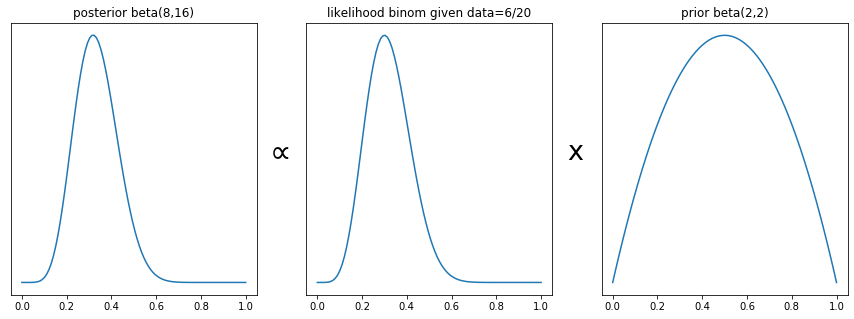

In [2]:
# Posterior là beta(a+k, b+n-k) = beta(8,16)

arr = np.linspace(0,1,100)
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot(arr, st.beta(a=8,b=16).pdf(arr))
ax[0].set_title("posterior beta(8,16)")
ax[0].get_yaxis().set_visible(False)

ax[1].plot(arr, st.binom(n=20, p=arr).pmf(6))
ax[1].set_title("likelihood binom given data=6/20")
ax[1].get_yaxis().set_visible(False)

ax[2].plot(arr, st.beta(2,2).pdf(arr))
ax[2].set_title("prior beta(2,2)")
ax[2].get_yaxis().set_visible(False)

fig.text(0.36,0.5,"$\propto$", size=30)
fig.text(0.64,0.5,"x", size=27);

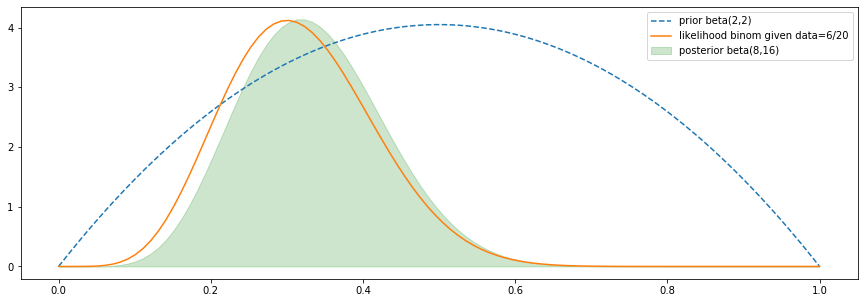

In [3]:
# plot chung 1 khung
arr = np.linspace(0,1,100)
plt.figure(figsize=(15,5))
plt.fill_between(arr, st.beta(a=8,b=16).pdf(arr), label="posterior beta(8,16)",alpha=0.2, color="green")
plt.plot(arr, st.beta(2,2).pdf(arr)*2.7, label="prior beta(2,2)", ls="--")
plt.plot(arr, st.binom(n=20, p=arr).pmf(6)*21.5, label="likelihood binom given data=6/20")
plt.legend();

In [4]:
# khoảng Credible interval 95%
st.beta(8,16).interval(0.95)

(0.16376359837494986, 0.5291916660085065)

In [5]:
# sếp nói nếu bạn chắc rằng là tỉ lệ thất bại p <0.35 với xác suất 90%,
# thì xét nghiệm mới được thông qua bước kiểm tiếp theo
# Theo bạn, p <0.35 với xác suất là bao nhiêu? Có qua được ải này không?
st.beta(8,16).cdf(0.35)

0.5864310314450809

In [6]:
# Bạn được hỗ trợ chi phí thêm 5 lần test nữa
# Đợt này, không test nào thất bại trong việc chẩn đoán đúng
# Theo bạn, với điều kiện như trên, test được thông qua không?
st.beta(8,16+5).cdf(0.35)

0.8179064455690616

---
# Gamma $\propto$ Poisson $\times$ Gamma

**Công thức:**  
Beta($\alpha+k,\beta+n$) $\propto$ Poisson($\lambda = \frac{k}{n}$) $\times$ Beta($\alpha,\beta$)


Nhắc lại:  
- Poisson($\lambda$) thường dùng để phân phối số đếm
- $\lambda$ là rate parameter, $=\frac{k}{n}$, k là số đếm trong khoảng thời gian, n là khoảng thời gian
- Ví dụ: k là tổng số bệnh nhân tới khám trong n tuần.



- $\alpha, \beta$ là hyperparameters của $\lambda$  
- Mean của Beta là $\alpha/\beta$
- Variance của Beta là $\alpha/\beta^2$

Mean của posterior beta = $\frac{\alpha+k}{\beta+n}$ = $\frac{\beta}{\beta+n}\frac{\alpha}{\beta} + \frac{n}{\beta+n}\frac{k}{n}$ = prior weight x prior mean + data weight + data mean  
Tương tự với bài trên, ta thấy:
- $\beta$ là effective sample size
- n là data size

Có 2 cách chọn $\alpha, \beta$ cho prior:
1. Chọn prior mean $\frac{\alpha}{\beta}$ = $\lambda$ từng biết ( your belief).  
    - Chọn thêm variance = $\alpha/\beta^2$, sau đó tính $\alpha$ và $\beta$.  
    - Hoặc dùng standard deviation = $\sqrt{\alpha}/\beta$, tính $\alpha$ và $\beta$.  
    - Hoặc chọn effective sample size là $\beta$, rồi tính $\alpha$.  
2. Chọn đại một số $\epsilon$ rất nhỏ 
    - prior = Gamma($\epsilon$, $\epsilon$)
    - $\frac{\alpha+\epsilon}{\beta+\epsilon} \approx \frac{\alpha}{\beta}$ vì $\epsilon$ không đáng kể
    - Còn gọi là vague prior

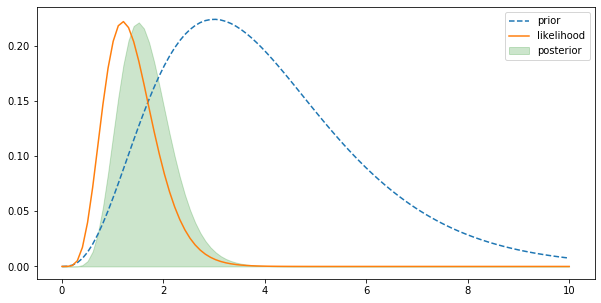

In [7]:
# xuất huyết não 4 ca/tuần
# Vì mình không sure nên chọn sample size nhỏ
# chọn prior gamma(a,b) với mean=4, sample size=1
# a/b =4; b =1 => prior Gamma(4 ,1)

# cho data như sau: 5 tuần, 6 cas
data = [1,2,2,0,1]
k = sum(data)
n = len(data)

# Vậy posterior = Gamma(4+k, 1+n)

plt.figure(figsize=(10,5))
arr = np.linspace(0, 10 , 100)
plt.plot(arr, st.gamma(4,scale=1).pdf(arr), label="prior", ls="--")
plt.plot(arr, arr**k * np.exp(-n*arr)*30, label="likelihood")
plt.fill_between(arr, st.gamma(4+k,scale=1/(1+n)).pdf(arr)*0.28, label="posterior", alpha=.2, color="green")
plt.legend();

In [8]:
# khoảng CI 95% posterior
st.gamma(4+k,scale=1/(1+n)).interval(.95)

(0.7992314493554056, 2.8474672419031943)